<a href="https://colab.research.google.com/github/shubha07m/vision-language-modeling/blob/main/VQA_PALIgemma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing PALIgemma HuggingFace for VQA

In [ ]:
# Importing libraries
from transformers import AutoProcessor, PaliGemmaForConditionalGeneration
from PIL import Image
import requests
import torch
from google.colab import files
import io

# Intializing paligemma model
model_id = "google/paligemma-3b-mix-224"

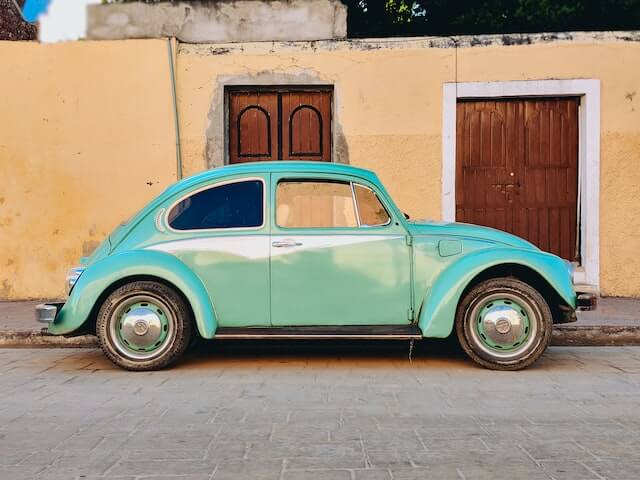

In [ ]:
# Intializing input image source
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg?download=true"
image = Image.open(requests.get(url, stream=True).raw)
display(image)

Saving rough_surface.jpg to rough_surface.jpg


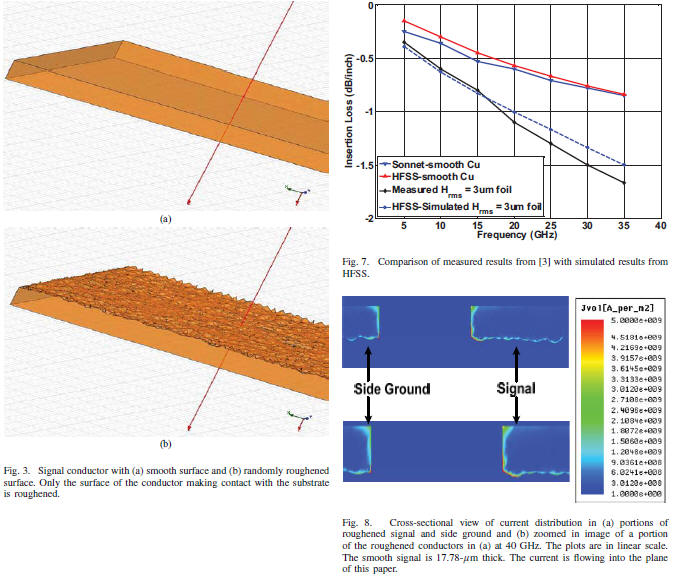

In [ ]:
# Upload the file
uploaded = files.upload()

# Get the uploaded file name
file_name = next(iter(uploaded))

# Open and display the image
image = Image.open(io.BytesIO(uploaded[file_name]))
display(image)

In [ ]:
# Intializing model and processor
model = PaliGemmaForConditionalGeneration.from_pretrained(model_id).eval()
processor = AutoProcessor.from_pretrained(model_id)

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# Instruct the model to answer questions
prompt = "which option between a and b has a more rough surface"
model_inputs = processor(text=prompt, images=image, return_tensors="pt")
input_len = model_inputs["input_ids"].shape[-1]

In [ ]:
with torch.inference_mode():
    generation = model.generate(**model_inputs, max_new_tokens=100, do_sample=False)
    generation = generation[0][input_len:]
    decoded = processor.decode(generation, skip_special_tokens=True)
    print(decoded)

b
